In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
import pandas as pd
df= pd.read_csv('./프로그램운영목적.csv', encoding='cp949')
df

프로그램 운영목적 일련번호  ...                                       프로그램 운영목적 내용
0    PRGRM_OPRTN_PRPS_CONNO  ...                              PRGRM_OPRTN_PRPS_CONT
1      PU_00000000000000011  ...  숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고, 협동 활동을 ...
2      PU_00000000000000012  ...          숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3      PU_00000000000000013  ...          적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4      PU_00000000000000018  ...        자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
..                      ...  ...                                                ...
165    PU_00000000000000224  ...       정신건강 증진을 위해 산림치유와 전통(지역)문화를 연계한 산림치유 프로그램 실시
166    PU_00000000000000331  ...  여름방학을 맞아 숲에서 사랑하는 가족과 함께 자연을 교감하며 행복한 시간을 보낼 수...
167    PU_00000000000000332  ...  숲체험 활동을 통해 심리적 안정 및 스트레스 해소 등 부모와 소통의 기회 제공 및 ...
168    PU_00000000000000333  ...                            산림복지의 미디어 교육 연계 프로그램 제공
169    PU_00000000000000334  ...  청소년 및 가족을 대상으로 산림복지와 미디어교육 연계서비스 제공으로 숲의 아름다움을...

[170 rows x 4 columns]

In [ ]:
df1 = df.drop([0])

#전처리 및 형태소 분석

In [ ]:
import re
import numpy as np

def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text 

df1['text']=df1['프로그램 운영목적 내용'].apply(clean_str)

In [ ]:
df1['text']

1      숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고  협동 활동을 ...
2              숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3              적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4            자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
5         나무심기를 통해 나무의  중요성 인지와 산림의 중요성을 깨닫게 되는 교육의 장 마련
                             ...                        
165         정신건강 증진을 위해 산림치유와 전통 지역 문화를 연계한 산림치유 프로그램 실시
166    여름방학을 맞아 숲에서 사랑하는 가족과 함께 자연을 교감하며 행복한 시간을 보낼 수...
167    숲체험 활동을 통해 심리적 안정 및 스트레스 해소 등 부모와 소통의 기회 제공 및 ...
168                              산림복지의 미디어 교육 연계 프로그램 제공
169    청소년 및 가족을 대상으로 산림복지와 미디어교육 연계서비스 제공으로 숲의 아름다움을...
Name: text, Length: 169, dtype: object

In [ ]:
!pip3 install konlpy

In [ ]:
from tqdm import tqdm
from konlpy.tag import Kkma
kkma=Kkma()

In [ ]:
def to_nouns(text):
    text_pos=kkma.pos(text)
    nouns=[]

    for a,b in text_pos:
        if len(a)>1:
            if'NN' in b:
                nouns.append(a)
    return nouns

In [ ]:
#형태소 분석 및 stopwords를 제거
stopwords=['이','가', '은', '는']
nountexts=[]

for e in tqdm(df1['text']):
    temp_X=[]
    temp_X=to_nouns(e)
    temp_X=[e for e in temp_X if not e in stopwords]

    if len(temp_X)>0:
        nountexts.append(temp_X)

100%|██████████| 169/169 [00:05<00:00, 28.17it/s]


# **빈도분석**

In [ ]:
#전체적인 토픽을 보기 위해 nested list를 풀어주기
all_texts=[]
for doc in nountexts:
    for e in doc:
        all_texts.append(e)

In [ ]:
#분석된 단어들의 순서
all_texts=pd.Series(all_texts)

In [ ]:
all_texts.value_counts().head(10)

프로그램    71
운영      51
스트레스    49
활동      49
해소      45
제공      43
다양      40
증진      35
기회      33
감각      31
dtype: int64

In [ ]:
count=pd.DataFrame(all_texts.value_counts())

In [ ]:
ncount.to_excel('ncount.xlsx')

## 워드클라우드

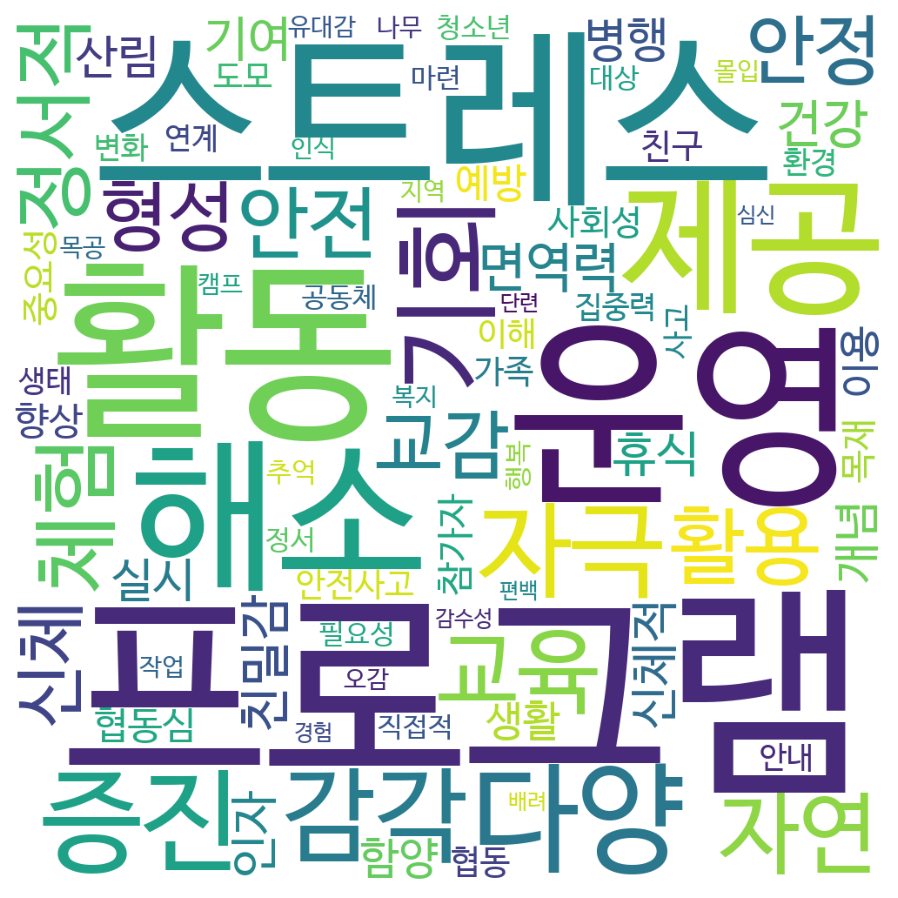

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=1000, height=1000)
cloud = wc.generate_from_frequencies(all_texts.value_counts().head(80))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

#토픽모델링

In [ ]:
from gensim import corpora, models
import gensim

In [ ]:
#각 단어에 숫자로 id를 부여
dictionary=corpora.Dictionary(nountexts)

In [ ]:
#그 단어에 대응하는 빈도를 연결
corpus=[dictionary.doc2bow(text) for text in nountexts]

In [ ]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary)

In [ ]:
ldamodel.print_topics(num_words=5)

[(0, '0.049*"체험" + 0.047*"진로" + 0.035*"제공" + 0.030*"프로그램" + 0.018*"스트레스"'),
 (1, '0.102*"프로그램" + 0.091*"운영" + 0.035*"다양" + 0.035*"스트레스" + 0.035*"자극"'),
 (2, '0.071*"교육" + 0.071*"안전" + 0.048*"실시" + 0.040*"예방" + 0.040*"안전사고"'),
 (3, '0.055*"이용" + 0.055*"목재" + 0.055*"향상" + 0.041*"해소" + 0.041*"스트레스"'),
 (4, '0.039*"제공" + 0.039*"중요성" + 0.039*"나무" + 0.021*"프로그램" + 0.021*"교육"'),
 (5, '0.076*"프로그램" + 0.074*"운영" + 0.040*"자연" + 0.040*"스트레스" + 0.040*"해소"'),
 (6, '0.044*"기회" + 0.039*"스트레스" + 0.039*"제공" + 0.031*"해소" + 0.031*"다양"'),
 (7, '0.057*"활동" + 0.038*"정서적" + 0.035*"제공" + 0.035*"안정" + 0.032*"증진"'),
 (8, '0.053*"제공" + 0.044*"스트레스" + 0.044*"활용" + 0.039*"기회" + 0.039*"인자"'),
 (9, '0.055*"프로그램" + 0.055*"운영" + 0.037*"체험" + 0.028*"해소" + 0.028*"기회"')]

In [ ]:
topicn=ldamodel.print_topics(num_words=10)

In [ ]:
topn=[]
for doc in topicn:
    for e in doc:
        topn.append(e)

In [ ]:
topn=pd.Series(topn)

In [ ]:
topn=pd.DataFrame(topn)

In [ ]:
topn.to_excel('tpn.xlsx')

#토픽모델링 시각화

In [ ]:
!pip install --upgrade pyLDAvis==2.1.2

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.039273 -0.139142       1        1  20.945466
8     -0.024997 -0.056030       2        1  16.200328
1     -0.164531  0.055974       3        1  14.090458
5     -0.181997  0.007835       4        1  12.926787
2      0.127759 -0.149510       5        1  10.833812
6      0.019800 -0.010301       6        1   6.867839
9     -0.080430  0.050825       7        1   6.177041
3      0.102217  0.107914       8        1   4.454079
4      0.132167  0.072532       9        1   3.757232
0      0.109285  0.059901      10        1   3.746957, topic_info=     Term       Freq      Total Category  logprob  loglift
44     운영  42.000000  42.000000  Default  30.0000  30.0000
133    안전  23.000000  23.000000  Default  29.0000  29.0000
28     교육  29.000000  29.000000  Default  28.0000  28.0000
17     체험  25.000000  25.000000  Default  27.0000  27.0000
47   프로그램  61.000000  61.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
34     기회   0.971127  29.304584  Topic10  -3.9914  -0.1228
6      증진   0.971137  29.762942  Topic10  -3.9914  -0.1383
47   프로그램   1.602353  61.038834  Topic10  -3.4907  -0.3558
42     해소   0.971142  37.587810  Topic10  -3.9914  -0.3717
40   스트레스   0.971172  41.305215  Topic10  -3.9914  -0.4660

[493 rows x 6 columns], token_table=      Topic      Freq Term
term                      
206       9  0.523922   가능
117       1  0.285029   가족
117       4  0.142514   가족
117       5  0.285029   가족
117       8  0.142514   가족
...     ...       ...  ...
64        4  0.355527   휴식
64        5  0.071105   휴식
64        7  0.071105   휴식
163       2  0.295799   힐링
163       3  0.591598   힐링

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 2, 6, 3, 7, 10, 4, 5, 1])

In [ ]:
pyLDAvis.save_html(lda_viz, './교육프로그램.html')